In [581]:
import pandas as pd 

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

pd.options.display.max_columns = None

pd.options.display.max_rows = None
    
pd.options.display.float_format = '{:.6f}'.format

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler 

from sklearn.utils import resample
from sklearn.utils import shuffle

from sklearn import metrics

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import random
from sklearn.metrics import mean_squared_error

The Data used in this model is taken from fred.stlouisfed,census.gov and worldbank.org

Since Data is collected from different sources, we have some in Monthly and others in Yearly and Quarterly format.
Hence we have converted the yearly and quarterly data to monthly format in the below steps. 

In [582]:
#Data is imported
import glob
path = 'C:\GL\housing'
files = glob.glob(path+"/*.csv")
files

['C:\\GL\\housing\\A-Fed_rate.csv',
 'C:\\GL\\housing\\GDP.csv',
 'C:\\GL\\housing\\home_price.csv',
 'C:\\GL\\housing\\invest.csv',
 'C:\\GL\\housing\\mort_rate.csv',
 'C:\\GL\\housing\\new_houses.csv',
 'C:\\GL\\housing\\permits.csv',
 'C:\\GL\\housing\\personal_saving.csv',
 'C:\\GL\\housing\\real_income.csv',
 'C:\\GL\\housing\\unemp_rate.csv']

In [583]:
li=[]
for filename in files:
    from datetime import datetime
    dateparse = lambda x: datetime.strptime(x, '%d-%m-%Y')

#     df = pd.read_csv(infile, parse_dates=['datetime'], date_parser=dateparse)
    df = pd.read_csv(filename,index_col=None,header=0,  parse_dates=['DATE'],  date_parser=dateparse)
    li.append(df)
from functools import reduce
df=reduce(lambda df1,df2: pd.merge(df1,df2,on='DATE'),li)

In [584]:
df.head()

,DATE,Fed_rate,GDP,home_price,INVESTMENT(in millions),mortgage_rate,new_houses_constructed,TOTAL PERMITS(in thousands),personal_savings,real expenditure,unemployment_rate
0,2000-01-01,5.448387,101.491397,100.552000,784940,8.210000,4.300000,107.300000,358.900000,9309.100000,4.000000
1,2000-02-01,5.734828,101.552445,101.339000,793737,8.325000,4.300000,121.800000,324.300000,9345.200000,4.100000
2,2000-03-01,5.853548,101.626906,102.127000,809459,8.240000,4.300000,153.700000,311.800000,9370.300000,4.000000
3,2000-04-01,6.019667,101.698161,102.922000,804766,8.152500,4.400000,138.900000,347.800000,9418.300000,3.800000
4,2000-05-01,6.268065,101.740194,103.677000,805005,8.515000,4.400000,148.900000,351.100000,9457.300000,4.000000


In [585]:
#we have created one more column join with the year value so as to join the yearly data with monthly data
df['DATE'] = pd.to_datetime(df['DATE'])
df['join']=df['DATE'].dt.year

In [586]:
df.head()

,DATE,Fed_rate,GDP,home_price,INVESTMENT(in millions),mortgage_rate,new_houses_constructed,TOTAL PERMITS(in thousands),personal_savings,real expenditure,unemployment_rate,join
0,2000-01-01,5.448387,101.491397,100.552000,784940,8.210000,4.300000,107.300000,358.900000,9309.100000,4.000000,2000
1,2000-02-01,5.734828,101.552445,101.339000,793737,8.325000,4.300000,121.800000,324.300000,9345.200000,4.100000,2000
2,2000-03-01,5.853548,101.626906,102.127000,809459,8.240000,4.300000,153.700000,311.800000,9370.300000,4.000000,2000
3,2000-04-01,6.019667,101.698161,102.922000,804766,8.152500,4.400000,138.900000,347.800000,9418.300000,3.800000,2000
4,2000-05-01,6.268065,101.740194,103.677000,805005,8.515000,4.400000,148.900000,351.100000,9457.300000,4.000000,2000


In [587]:
import glob
path = 'C:\GL\housing\change'
files = glob.glob(path+"/*.csv")
files

['C:\\GL\\housing\\change\\inflation.csv',
 'C:\\GL\\housing\\change\\pop_growth.csv']

In [588]:
li=[df]
for filename in files:
    dateparse = lambda x: datetime.strptime(x, '%d-%m-%Y')

#     df = pd.read_csv(infile, parse_dates=['datetime'], date_parser=dateparse)
    df = pd.read_csv(filename,index_col=None,header=0,  parse_dates=['DATE'],  date_parser=dateparse)
#     df = pd.read_csv(filename,index_col=None,header=0)
    df['DATE']=pd.to_datetime(df['DATE'])
    df['join']=df['DATE'].dt.year
    df.drop('DATE', axis=1, inplace=True)
    li.append(df)
from functools import reduce
df=reduce(lambda df1,df2: pd.merge(df1,df2,on='join'),li)

In [589]:
df.head()

,DATE,Fed_rate,GDP,home_price,INVESTMENT(in millions),mortgage_rate,new_houses_constructed,TOTAL PERMITS(in thousands),personal_savings,real expenditure,unemployment_rate,join,inflation,population_growth
0,2000-01-01,5.448387,101.491397,100.552000,784940,8.210000,4.300000,107.300000,358.900000,9309.100000,4.000000,2000,3.376857,1.112769
1,2000-02-01,5.734828,101.552445,101.339000,793737,8.325000,4.300000,121.800000,324.300000,9345.200000,4.100000,2000,3.376857,1.112769
2,2000-03-01,5.853548,101.626906,102.127000,809459,8.240000,4.300000,153.700000,311.800000,9370.300000,4.000000,2000,3.376857,1.112769
3,2000-04-01,6.019667,101.698161,102.922000,804766,8.152500,4.400000,138.900000,347.800000,9418.300000,3.800000,2000,3.376857,1.112769
4,2000-05-01,6.268065,101.740194,103.677000,805005,8.515000,4.400000,148.900000,351.100000,9457.300000,4.000000,2000,3.376857,1.112769


In [590]:
import glob
path = 'C:\GL\housing\change\change1'
files = glob.glob(path+"/*.csv")
files

['C:\\GL\\housing\\change\\change1\\delinq.csv']

In [591]:
#Quarterly data is joined with yearly and monthly data
df['quarter'] = df['DATE'].dt.quarter
li=[df]
# for filename in files:
dateparse = lambda x: datetime.strptime(x, '%d-%m-%Y')

#     df = pd.read_csv(infile, parse_dates=['datetime'], date_parser=dateparse)
df1 = pd.read_csv('C:\\GL\\housing\\change\\change1\\delinq.csv',index_col=None,header=0,  parse_dates=['DATE'],  date_parser=dateparse)
# df1 = pd.read_csv('C:\\GL\\housing\\change\\change1\\delinq.csv',index_col=None,header=0)
df1['DATE']=pd.to_datetime(df1['DATE'])
df1['quarter']=df1['DATE'].dt.quarter
df1['join']=df1['DATE'].dt.year
df1.drop('DATE', axis=1, inplace=True)
#     li.append(df)
from functools import reduce
# df=reduce(lambda df1,df2: pd.merge(df1,df2,on=['join','quarter']),li)
df = pd.merge(df,df1,on=['join','quarter'])

In [592]:
df.head(10)

,DATE,Fed_rate,GDP,home_price,INVESTMENT(in millions),mortgage_rate,new_houses_constructed,TOTAL PERMITS(in thousands),personal_savings,real expenditure,unemployment_rate,join,inflation,population_growth,quarter,delinquency rate
0,2000-01-01,5.448387,101.491397,100.552000,784940,8.210000,4.300000,107.300000,358.900000,9309.100000,4.000000,2000,3.376857,1.112769,1,1.950000
1,2000-02-01,5.734828,101.552445,101.339000,793737,8.325000,4.300000,121.800000,324.300000,9345.200000,4.100000,2000,3.376857,1.112769,1,1.950000
2,2000-03-01,5.853548,101.626906,102.127000,809459,8.240000,4.300000,153.700000,311.800000,9370.300000,4.000000,2000,3.376857,1.112769,1,1.950000
3,2000-04-01,6.019667,101.698161,102.922000,804766,8.152500,4.400000,138.900000,347.800000,9418.300000,3.800000,2000,3.376857,1.112769,2,1.890000
4,2000-05-01,6.268065,101.740194,103.677000,805005,8.515000,4.400000,148.900000,351.100000,9457.300000,4.000000,2000,3.376857,1.112769,2,1.890000
5,2000-06-01,6.528333,101.732697,104.424000,795411,8.288000,4.800000,155.100000,355.300000,9483.300000,4.000000,2000,3.376857,1.112769,2,1.890000
6,2000-07-01,6.544516,101.678298,105.054000,783795,8.147500,4.100000,129.800000,383.800000,9533.300000,4.000000,2000,3.376857,1.112769,3,2.070000
7,2000-08-01,6.496774,101.588896,105.767000,805341,8.027500,4.400000,146.800000,389.900000,9591.500000,4.100000,2000,3.376857,1.112769,3,2.070000
8,2000-09-01,6.517000,101.475487,106.537000,814330,7.912000,4.000000,131.400000,340.800000,9601.500000,3.900000,2000,3.376857,1.112769,3,2.070000
9,2000-10-01,6.509355,101.340753,107.382000,816100,7.795000,4.000000,134.800000,360.300000,9627.400000,3.900000,2000,3.376857,1.112769,4,2.420000


In [593]:
df=df.drop(['join','quarter'],axis=1)

In [594]:
df.head()

,DATE,Fed_rate,GDP,home_price,INVESTMENT(in millions),mortgage_rate,new_houses_constructed,TOTAL PERMITS(in thousands),personal_savings,real expenditure,unemployment_rate,inflation,population_growth,delinquency rate
0,2000-01-01,5.448387,101.491397,100.552000,784940,8.210000,4.300000,107.300000,358.900000,9309.100000,4.000000,3.376857,1.112769,1.950000
1,2000-02-01,5.734828,101.552445,101.339000,793737,8.325000,4.300000,121.800000,324.300000,9345.200000,4.100000,3.376857,1.112769,1.950000
2,2000-03-01,5.853548,101.626906,102.127000,809459,8.240000,4.300000,153.700000,311.800000,9370.300000,4.000000,3.376857,1.112769,1.950000
3,2000-04-01,6.019667,101.698161,102.922000,804766,8.152500,4.400000,138.900000,347.800000,9418.300000,3.800000,3.376857,1.112769,1.890000
4,2000-05-01,6.268065,101.740194,103.677000,805005,8.515000,4.400000,148.900000,351.100000,9457.300000,4.000000,3.376857,1.112769,1.890000


In [595]:
df.dtypes

DATE                           datetime64[ns]
Fed_rate                              float64
GDP                                   float64
home_price                            float64
INVESTMENT(in millions)                 int64
mortgage_rate                         float64
new_houses_constructed                float64
TOTAL PERMITS(in thousands)           float64
personal_savings                      float64
real expenditure                      float64
unemployment_rate                     float64
inflation                             float64
population_growth                     float64
delinquency rate                      float64
dtype: object

In [596]:
df.shape

(252, 14)

In [597]:
df.describe()

,Fed_rate,GDP,home_price,INVESTMENT(in millions),mortgage_rate,new_houses_constructed,TOTAL PERMITS(in thousands),personal_savings,real expenditure,unemployment_rate,inflation,population_growth,delinquency rate
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.716926,99.907234,161.661671,1049343.242063,5.092968,5.770238,110.221429,805.801190,12115.220238,5.986508,2.125871,0.820362,4.745952
std,1.898628,1.317362,30.658551,208758.960818,1.326817,1.917841,41.254243,634.108618,1677.360546,1.978262,1.045680,0.160140,3.279091
min,0.049000,91.580035,100.552000,758376.000000,2.684000,3.300000,36.300000,193.400000,9309.100000,3.500000,-0.355546,0.455381,1.400000
25%,0.144833,99.567942,140.312000,855873.250000,3.957000,4.300000,77.775000,406.650000,10787.825000,4.575000,1.586032,0.726787,2.100000
50%,1.034516,99.947313,161.968500,1015407.500000,4.848750,5.300000,110.450000,727.250000,11930.100000,5.400000,2.130110,0.859482,3.220000
75%,2.400726,100.552153,183.025000,1182431.500000,6.145625,6.600000,137.025000,1019.475000,13398.425000,7.200000,2.852672,0.945865,7.445000
max,6.544516,101.829671,235.700000,1566367.000000,8.515000,12.200000,211.900000,6392.500000,17170.700000,14.700000,3.839100,1.112769,11.360000


In [598]:
df.isnull().sum()
#there are no missing values

DATE                           0
Fed_rate                       0
GDP                            0
home_price                     0
INVESTMENT(in millions)        0
mortgage_rate                  0
new_houses_constructed         0
TOTAL PERMITS(in thousands)    0
personal_savings               0
real expenditure               0
unemployment_rate              0
inflation                      0
population_growth              0
delinquency rate               0
dtype: int64

In [631]:
plt.rcParams['figure.figsize'] = [15,8]

<AxesSubplot:>

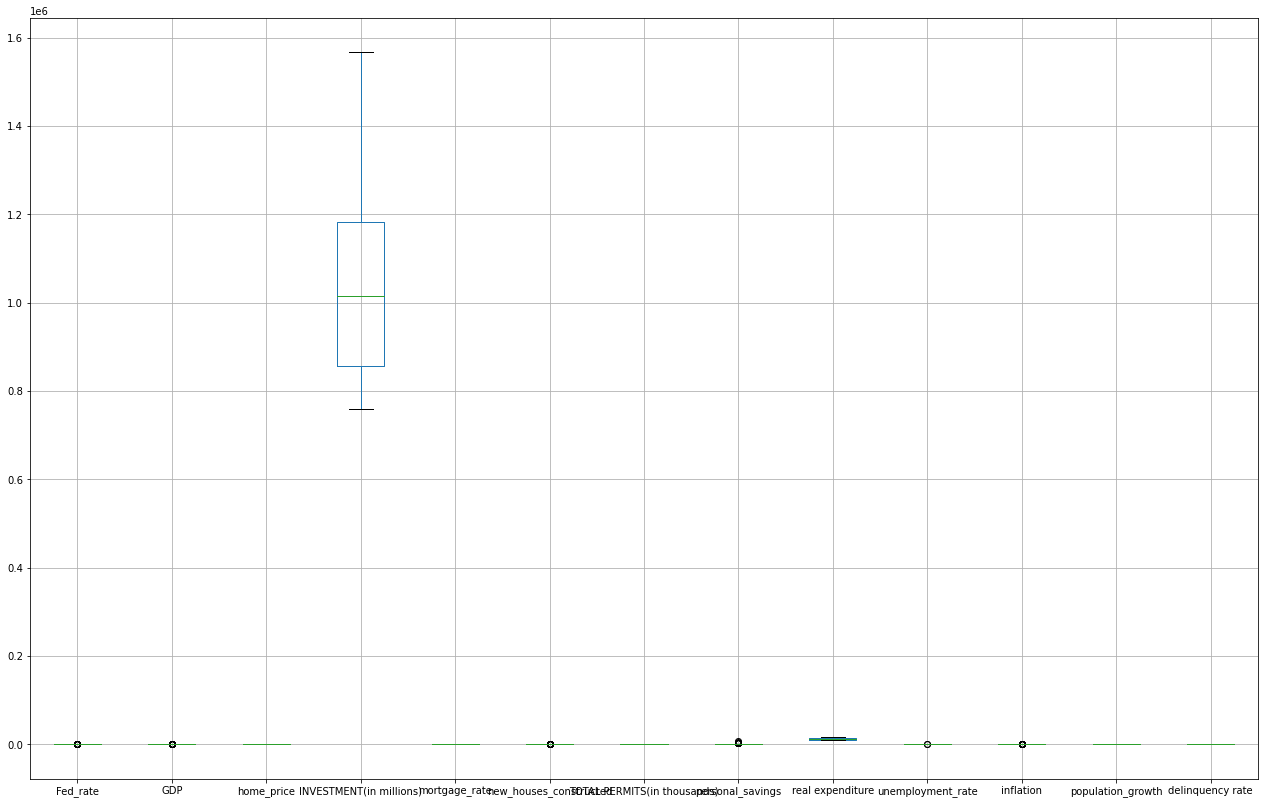

In [600]:
df.boxplot()

In [ ]:
#Not doing outlier treatment as the number of records available is very less and will be difficult to train the model.

In [601]:
df = df.drop(['DATE'],axis=1)

<AxesSubplot:>

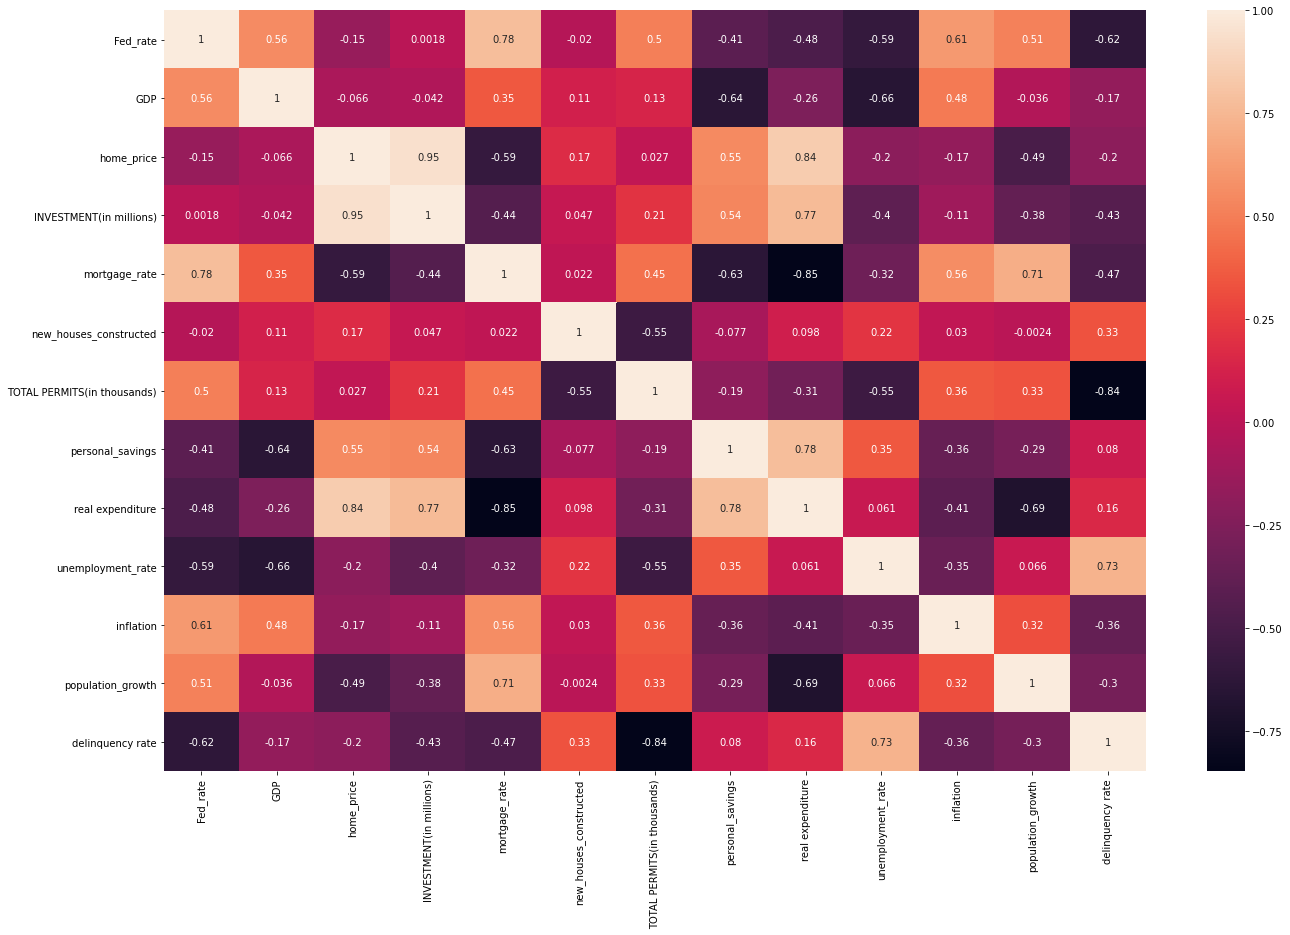

In [629]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
#target column home price is having good coorelation with investment and real expenditure.

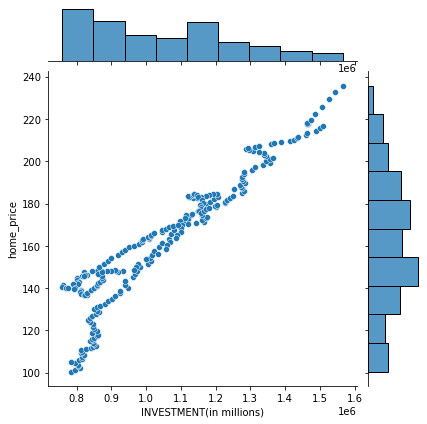

In [635]:
sns.jointplot(data=df,x='INVESTMENT(in millions)',y='home_price')
plt.show()

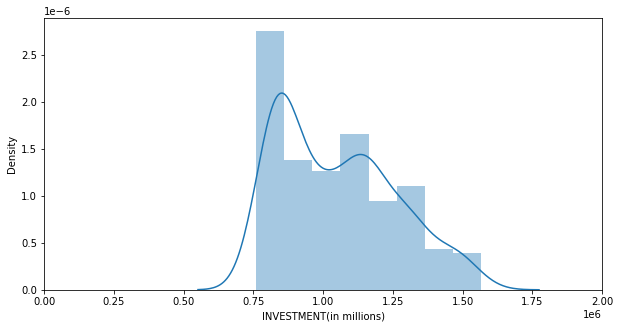

In [660]:
plt.figure(figsize=(10,5))
plt.xlim(0,2000000)
plt.xlabel('Price')
plt.ylabel('Density')
sns.distplot(df['INVESTMENT(in millions)'])
plt.show()

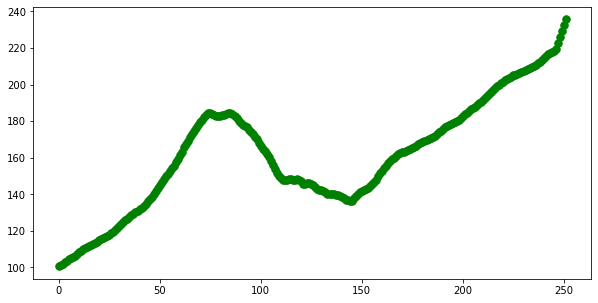

In [661]:
plt.figure(figsize=(10,5))
df.groupby('real expenditure')['home_price'].plot(kind='line',marker='.',markersize=15,color='green')
plt.show()

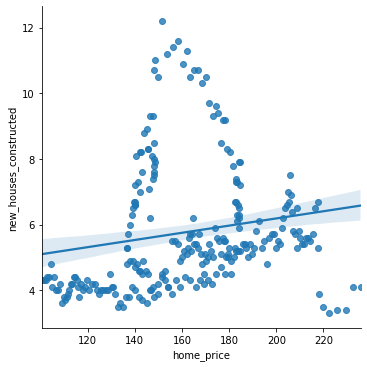

In [659]:
sns.lmplot(data=df,x='home_price',y='new_houses_constructed')
plt.show()

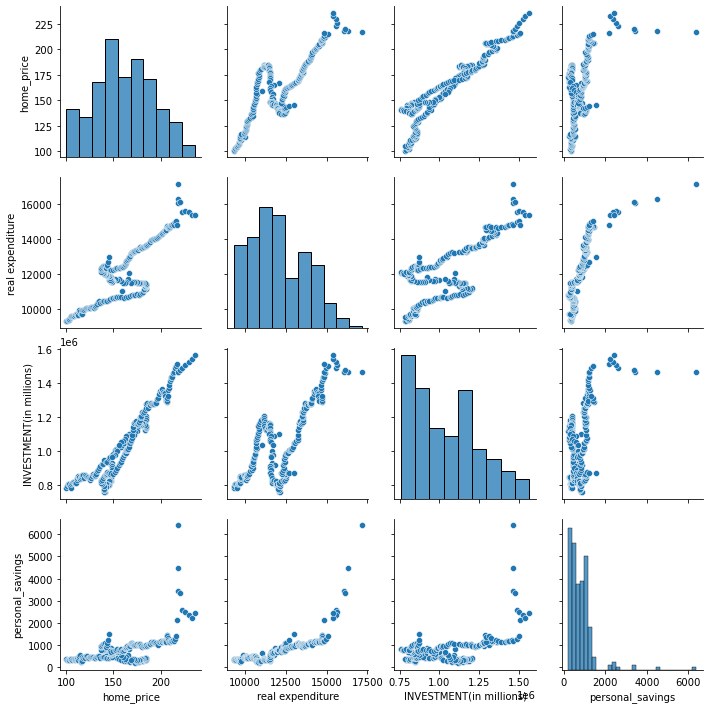

In [658]:
sns.pairplot(df[['home_price','real expenditure','INVESTMENT(in millions)','personal_savings']])
plt.show()

In [602]:
X_scaler = StandardScaler()

# scaling all the numerical columns

num_scaled = X_scaler.fit_transform(df)

# dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
X = pd.DataFrame(num_scaled, columns = df.columns)

# display first five observations
X.head()

,Fed_rate,GDP,home_price,INVESTMENT(in millions),mortgage_rate,new_houses_constructed,TOTAL PERMITS(in thousands),personal_savings,real expenditure,unemployment_rate,inflation,population_growth,delinquency rate
0,1.969258,1.204920,-1.997201,-1.269068,2.353931,-0.768137,-0.070956,-0.706173,-1.676267,-1.006166,1.198719,1.829588,-0.854358
1,2.120425,1.251353,-1.971480,-1.226845,2.440777,-0.768137,0.281222,-0.760847,-1.654703,-0.955516,1.198719,1.829588,-0.854358
2,2.183079,1.307988,-1.945726,-1.151384,2.376587,-0.768137,1.056015,-0.780599,-1.639709,-1.006166,1.198719,1.829588,-0.854358
3,2.270747,1.362185,-1.919744,-1.173909,2.310508,-0.715891,0.696550,-0.723713,-1.611035,-1.107466,1.198719,1.829588,-0.872692
4,2.401838,1.394155,-1.895069,-1.172762,2.584262,-0.715891,0.939432,-0.718498,-1.587738,-1.006166,1.198719,1.829588,-0.872692


In [603]:
df_feature = X.drop(['home_price'],axis=1)

In [604]:
df_target = X['home_price']
df_target.head()

0   -1.997201
1   -1.971480
2   -1.945726
3   -1.919744
4   -1.895069
Name: home_price, dtype: float64

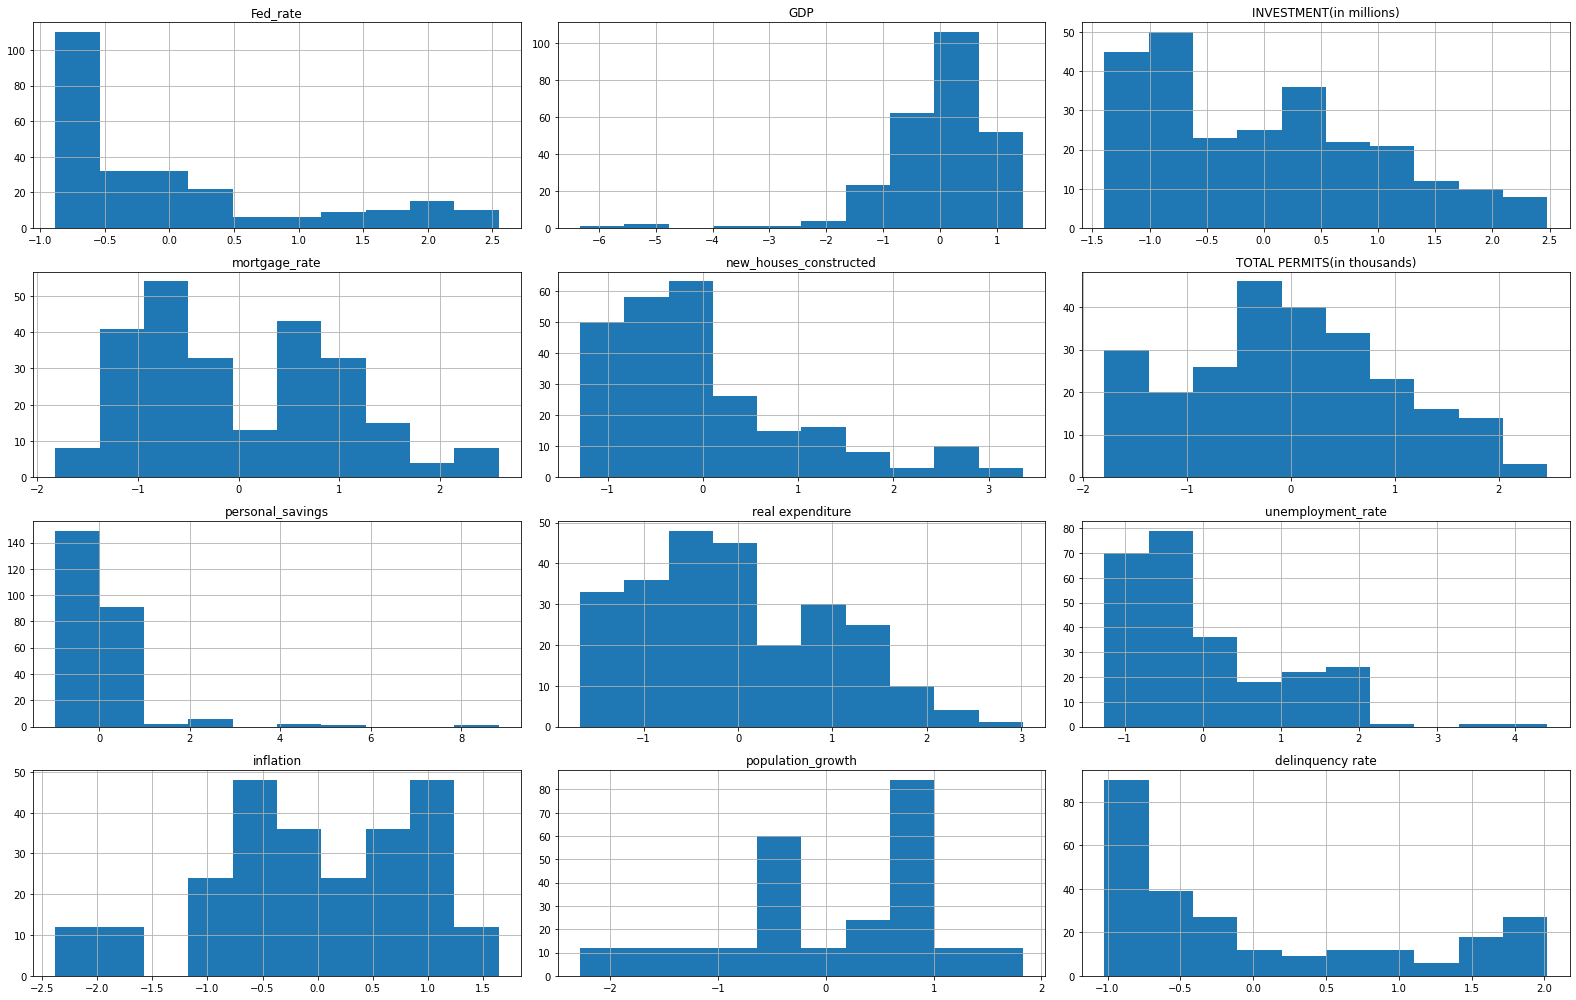

In [605]:
df_feature.hist()


# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()  

In [606]:
# split data into train subset and test subset
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(df_feature, df_target, random_state = 10, test_size = 0.2)

# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (201, 12)
y_train (201,)
X_test (51, 12)
y_test (51,)


In [607]:
decision_tree = DecisionTreeRegressor(random_state=10)

# fit the model using fit() on train data
decision_tree = decision_tree.fit(X_train, y_train)

# predict the attrition for test set
y_pred_dt = decision_tree.predict(X_test)

# create a dataframe that stores the feature names and their importance
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': decision_tree.feature_importances_})

# print the dataframe
important_features.sort_values(by='Importance', ascending=False)

,Features,Importance
2,INVESTMENT(in millions),0.726896
7,real expenditure,0.237813
9,inflation,0.018978
0,Fed_rate,0.005474
1,GDP,0.003727
3,mortgage_rate,0.002734
11,delinquency rate,0.001774
8,unemployment_rate,0.001450
6,personal_savings,0.000568
10,population_growth,0.000373


In [608]:
mse_test = mean_squared_error(y_test, y_pred_dt)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_test = round(np.sqrt(mse_test), 4)

# print the RMSE for the test set
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on test set:  0.0641


In [609]:
random_forest = RandomForestRegressor(random_state=10)

# fit the model using fit() on train data
random_forest = random_forest.fit(X_train, y_train)

# predict the attrition for test set
y_pred_rf = random_forest.predict(X_test)

# create a dataframe that stores the feature names and their importance
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': random_forest.feature_importances_})

# print the dataframe
important_features.sort_values(by='Importance', ascending=False)

,Features,Importance
2,INVESTMENT(in millions),0.763140
7,real expenditure,0.161433
0,Fed_rate,0.026624
10,population_growth,0.010846
8,unemployment_rate,0.010145
9,inflation,0.009897
3,mortgage_rate,0.006539
1,GDP,0.004959
11,delinquency rate,0.002177
6,personal_savings,0.002140


In [610]:
mse_test = mean_squared_error(y_test, y_pred_rf)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_test = round(np.sqrt(mse_test), 4)

# print the RMSE for the test set
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on test set:  0.0759


In [672]:
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Method of selecting samples for training each tree
# Create the random grid
random_grid = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf
}

# Initialize the RandomizedSearchCV object with estimators is RandomForestRegressor of
#cross validation is 5 with n_jobs = -1 ( that is parallel processing )

random_rf = RandomizedSearchCV(RandomForestRegressor(), param_distributions=random_grid, cv=5, n_iter=10,n_jobs=-1,random_state=10)

# fit the object
random_rf.fit(X_train, y_train)


# Display the best selected parameter by the randomizedSearchCV
print(random_rf.best_params_)

{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 30}


In [669]:
random_forest_tuned_model = RandomForestRegressor(n_estimators= 300, min_samples_split= 5, 
                                                  min_samples_leaf= 2, max_features= 'auto', max_depth= 30)

# use fit() to fit the model on the train set
random_forest_tuned_model = random_forest_tuned_model.fit(X_train, y_train)

y_pred = random_forest_tuned_model.predict(X_test)

# create a dataframe that stores the feature names and their importance
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': random_forest_tuned_model.feature_importances_})

# print the dataframe
important_features.sort_values(by='Importance', ascending=False)


# create a barplot to visualize the features based on their importance
# sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
# plt.title('Feature Importance', fontsize = 15)
# plt.xlabel('Importance', fontsize = 15)
# plt.ylabel('Features', fontsize = 15)

# # display the plot
# plt.show()

,Features,Importance
2,INVESTMENT(in millions),0.762264
7,real expenditure,0.162881
0,Fed_rate,0.030095
9,inflation,0.010052
8,unemployment_rate,0.008137
10,population_growth,0.007624
3,mortgage_rate,0.005263
1,GDP,0.005111
6,personal_savings,0.004393
11,delinquency rate,0.002132


In [670]:
mse_test = mean_squared_error(y_test, y_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_test = round(np.sqrt(mse_test), 4)

# print the RMSE for the test set
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on test set:  0.0814


In [614]:
xg_model = XGBRegressor(random_state=10)
# fit the model using fit() on train data

xg_model = xg_model.fit(X_train,y_train)
# predict the attrition for test set

y_pred_xgb = xg_model.predict(X_test)
# create a dataframe that stores the feature names and their importance

important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': xg_model.feature_importances_})

important_features.sort_values(by='Importance', ascending=False)

,Features,Importance
2,INVESTMENT(in millions),0.593213
7,real expenditure,0.319915
9,inflation,0.044631
10,population_growth,0.023112
8,unemployment_rate,0.009074
3,mortgage_rate,0.002962
6,personal_savings,0.002345
0,Fed_rate,0.002163
1,GDP,0.001027
11,delinquency rate,0.000776


In [615]:
mse_test = mean_squared_error(y_test, y_pred_xgb)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_test = round(np.sqrt(mse_test), 4)

# print the RMSE for the test set
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on test set:  0.0703


In [616]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
base_score=[0.25,0.5,0.75,1]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [617]:
#Initialize the RandomizedSearchCV object with estimator as XGBRegressor of
#cross validation 5 with n_jobs = 4 
random_cv = RandomizedSearchCV(estimator=xg_model,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [618]:
random_cv.fit(X_train,y_train)
# fit the object

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=0, gpu_id=-1,
                                          grow_policy='depthwise',
                                          importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_bin=256, m...
                                          random_state=10, reg_alpha=0,
                                          reg_lambda=1, ...),
              

In [619]:
random_cv.best_estimator_
# Display the best estimator

XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=2,
             missing=nan, monotone_constraints='()', n_estimators=1500,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=10,
             reg_alpha=0, reg_lambda=1, ...)

In [625]:
xg_model = XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=2,
              monotone_constraints='()', n_estimators=1500,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=10,)

In [626]:
# use fit() to fit the model on the train set
xg_model = xg_model.fit(X_train,y_train)

y_pred_xgb = xg_model.predict(X_test)
# create a dataframe that stores the feature names and their importance

important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': xg_model.feature_importances_})

important_features.sort_values(by='Importance', ascending=False)

,Features,Importance
2,INVESTMENT(in millions),0.635628
7,real expenditure,0.246235
9,inflation,0.077711
0,Fed_rate,0.020102
3,mortgage_rate,0.006453
10,population_growth,0.006225
8,unemployment_rate,0.004252
1,GDP,0.002028
6,personal_savings,0.000455
11,delinquency rate,0.000445


In [627]:
mse_test = mean_squared_error(y_test, y_pred_xgb)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_test = round(np.sqrt(mse_test), 4)

# print the RMSE for the test set
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on test set:  0.0544


From the above test results, Hyper-parameter tuned XGBoost Regressor model is giving the best RMSE score

Hence we can take the Important features from it.

1.Investments in the construction industry has more importance in deciding home prices,
and an indicator of supply for future months.
2.The other important feature is real expenditure which is the disposable personal income and tells how much of the earning is actually available to an individual for expenditure